# Micron-BERT: BERT-based Facial Micro-Expression Recognition

## **1. Micro-Expression Recognition Challenge**
- Micro-expressions are **subtle facial movements** lasting **0.25 to 0.5 seconds**.
- Detecting them is **challenging** as they are difficult for humans to perceive.
- Recognition of these expressions plays a key role in **affective computing**.

## **2. Limitations of Standard BERT in Vision**
- Traditional **Bidirectional Transformers (BERT)** models are designed for **full images or videos**.
- They fail to capture **tiny facial movements** necessary for micro-expression detection.

## **3. Proposed Micron-BERT Model**
- **Micron-BERT** is a novel **deep learning approach** tailored for **micro-expression recognition**.
- It is **self-supervised**, meaning it can detect micro-expressions **without labeled data**.

## **4. Key Innovations**
- **Diagonal Micro-Attention (DMA):**
  - Detects tiny differences between **two consecutive frames**.
- **Patch of Interest (PoI) Module:**
  - Identifies and **highlights key micro-expression regions** while **suppressing background noise**.

## **5. Performance and Scalability**
- Trained on a **large-scale unlabeled dataset** (up to **8 million images**).
- **Outperforms state-of-the-art (SOTA) methods** on four major micro-expression datasets:
  - **SAMM, CASME II, SMIC, and CASME3**.
- Achieves significant accuracy improvements over previous methods.

## **6. Availability**
- The **code will be released** at: [GitHub Repository](https://github.com/uark-cviu/Micron-BERT).

## 1. Introduction
Micron-BERT (µ-BERT) is a deep learning model developed to recognize facial micro-expressions. These expressions are involuntary and very brief, making them difficult to detect. µ-BERT utilizes a BERT-based architecture to capture subtle facial changes across video frames.

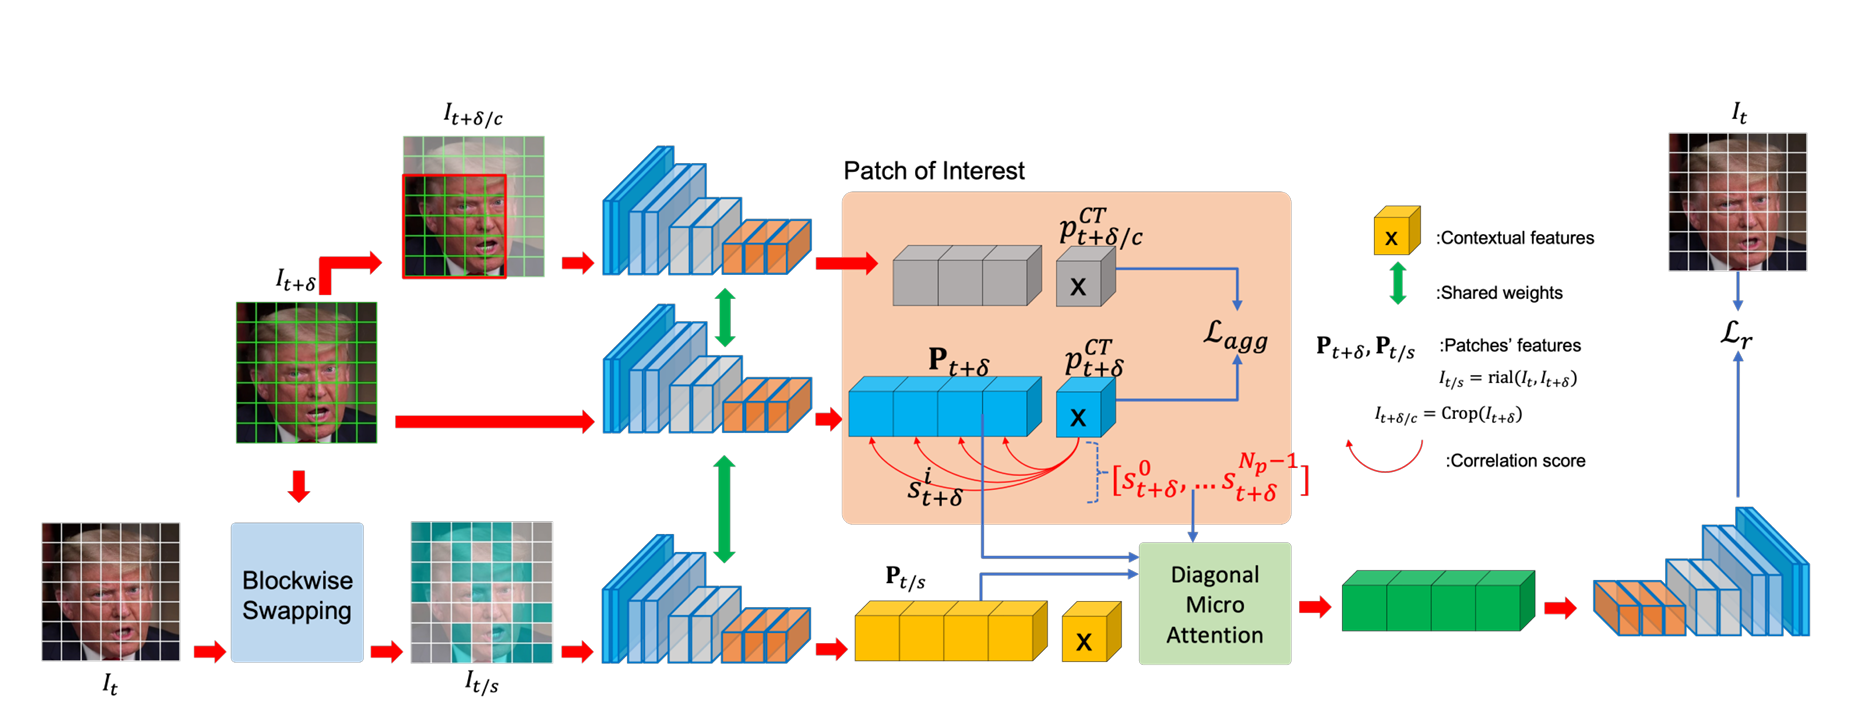

## 2. Data Processing Steps

### 2.1 Image Input and Patch Extraction
µ-BERT takes a facial image or video frames and divides the image into non-overlapping patches. Each patch is represented as a latent vector using the µ-Encoder.

In [61]:
# Code for loading and processing image patches
import cv2
import numpy as np

def extract_patches(image, patch_size=8):
    h, w, c = image.shape
    patches = [image[i:i+patch_size, j:j+patch_size] 
               for i in range(0, h, patch_size) 
               for j in range(0, w, patch_size)]
    return np.array(patches)

# Load an example image
image = cv2.imread('example1.jpg')
image_resized = cv2.resize(image, (224, 224)) 
patches = extract_patches(image_resized)
print('Extracted patches:', patches.shape)

Extracted patches: (784, 8, 8, 3)


### 2.2 µ-Encoder
The µ-Encoder transforms image patches into latent vectors, using positional encoding to maintain spatial information. It employs multi-head attention and multi-layer perceptrons (MLP) to process the patches.

In [63]:
# Code for a simple µ-Encoder implementation
import torch
import torch.nn as nn

class MicroEncoder(nn.Module):
    def __init__(self, patch_dim, latent_dim):
        super(MicroEncoder, self).__init__()
        self.fc = nn.Linear(patch_dim, latent_dim)

    def forward(self, x):
        return self.fc(x)

encoder = MicroEncoder(64, 128)
sample_patch = torch.rand(1, 64)
encoded_patch = encoder(sample_patch)
print('Encoded patch shape:', encoded_patch.shape)

Encoded patch shape: torch.Size([1, 128])


### 2.3 Patch of Interest (PoI)
The Patch of Interest (PoI) module identifies the facial regions most relevant to micro-expressions, such as eyes and mouth, ignoring irrelevant background information.

### 2.4 Blockwise Swapping

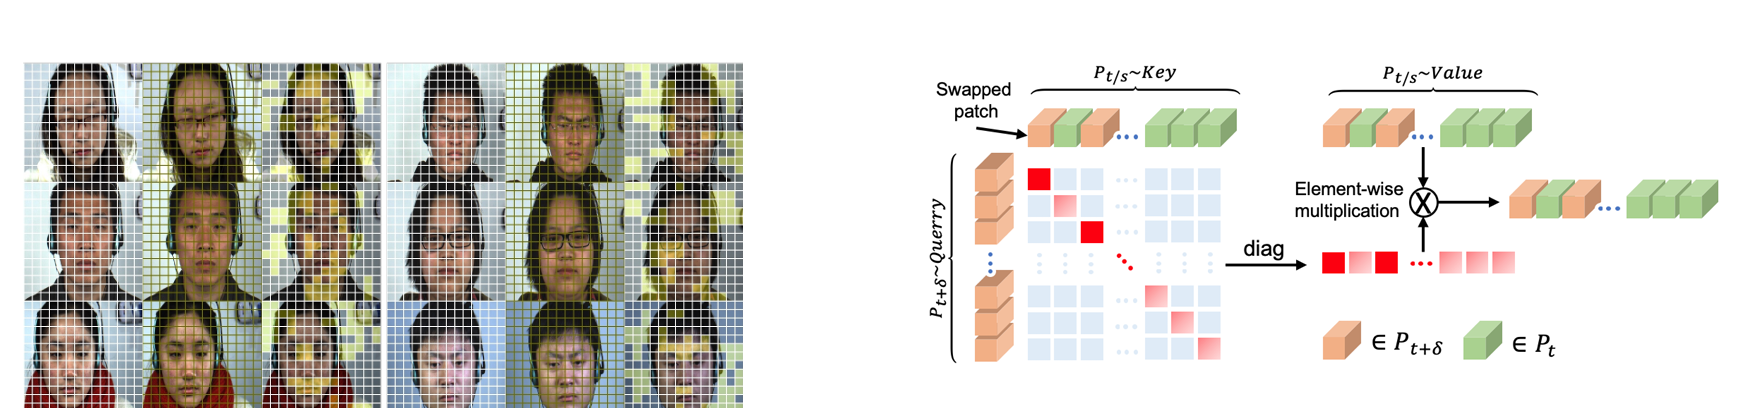
To train the model to recognize small differences, corresponding patches from two consecutive frames are swapped. The model learns to spot and restore these swapped patches.

### 2.5 Diagonal Micro-Attention (DMA)
DMA is used to detect subtle differences in patches. It calculates an attention map between patches and focuses on diagonal elements representing micro-movements.

In [65]:
# Code for a simple attention mechanism (DMA concept)
def attention_map(q, k, v):
    scores = torch.matmul(q, k.transpose(-2, -1))
    attention_weights = torch.softmax(scores, dim=-1)
    output = torch.matmul(attention_weights, v)
    return output

# Example usage
q = k = v = torch.rand(10, 128)
attention_output = attention_map(q, k, v)
print('Attention output shape:', attention_output.shape)

Attention output shape: torch.Size([10, 128])


### 2.6 µ-Decoder
The µ-Decoder reconstructs the image from the latent vectors, helping the model focus on micro-expressions.

In [67]:
# Code for a simple µ-Decoder implementation
class MicroDecoder(nn.Module):
    def __init__(self, latent_dim, patch_dim):
        super(MicroDecoder, self).__init__()
        self.fc = nn.Linear(latent_dim, patch_dim)

    def forward(self, x):
        return self.fc(x)

decoder = MicroDecoder(128, 64)
decoded_patch = decoder(encoded_patch)
print('Decoded patch shape:', decoded_patch.shape)

Decoded patch shape: torch.Size([1, 64])


## 3. Output Generation
After training, the model outputs the predicted class for each input frame, indicating the detected micro-expression (e.g., happy, angry, sad, etc.).

In [95]:
# Example of prediction output
expression_labels = ['Happy', 'Angry', 'Sad']
predicted_index = torch.randint(0, 3, (1,)).item()
print('Predicted expression:', expression_labels[predicted_index])

Predicted expression: Sad


## 4 Loss Functions

•	Reconstruction Loss (Lr): Ensures accurate reconstruction of input images.

•	Contextual Agreement Loss (Lagg): Forces the model to focus on meaningful patches.


## Result

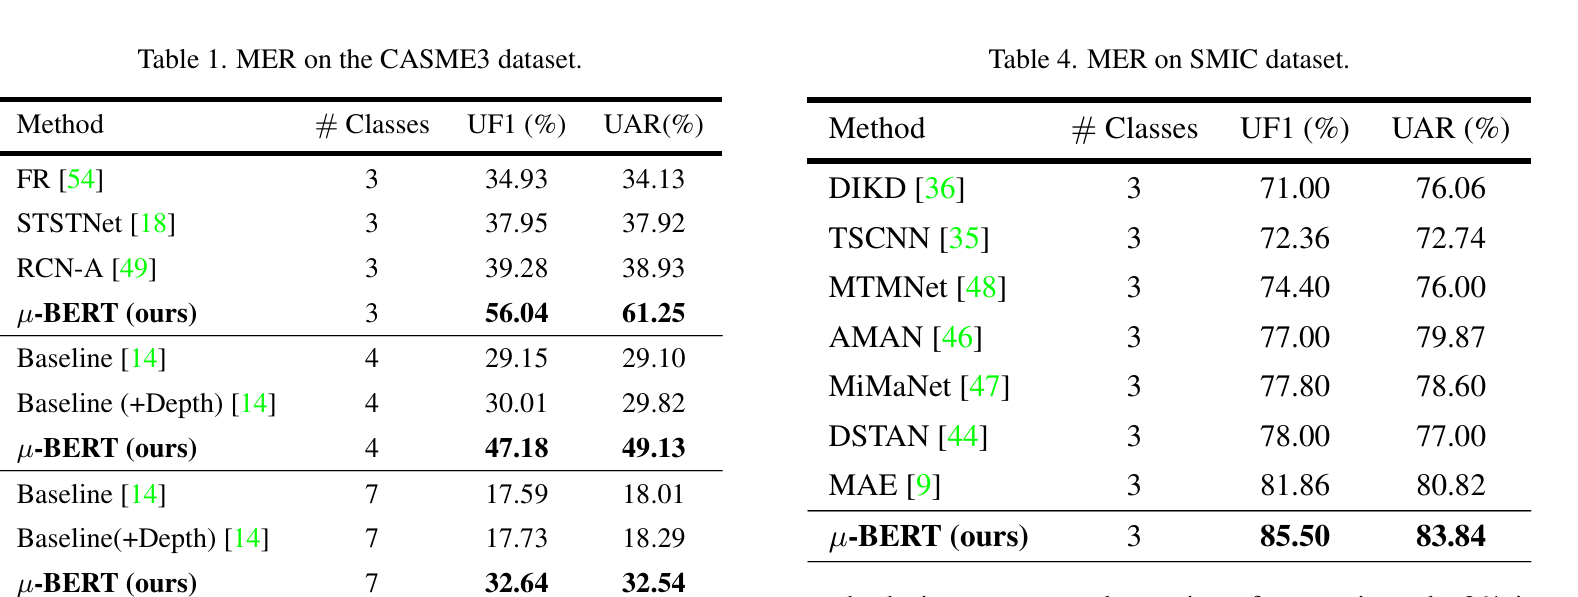
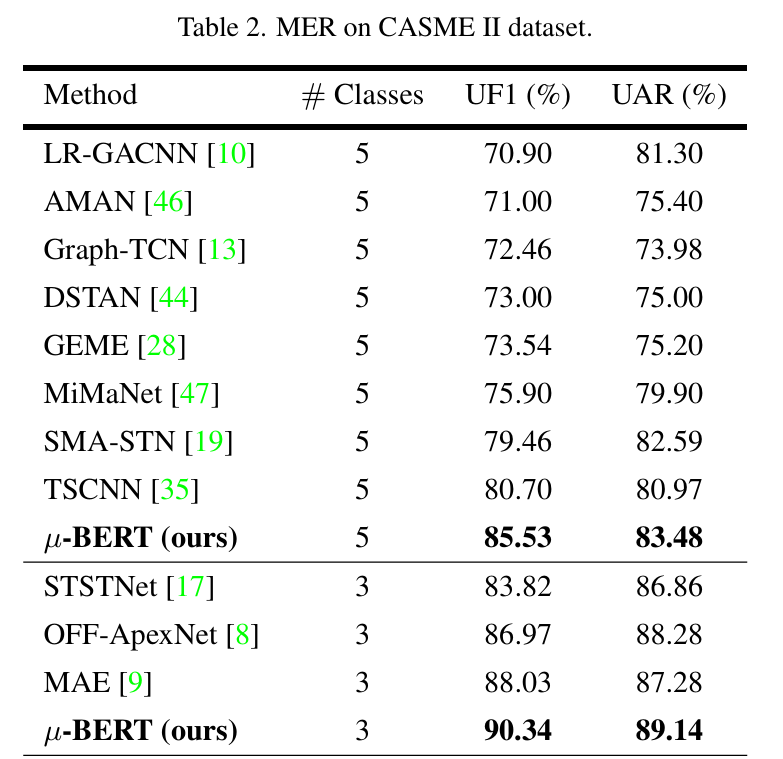
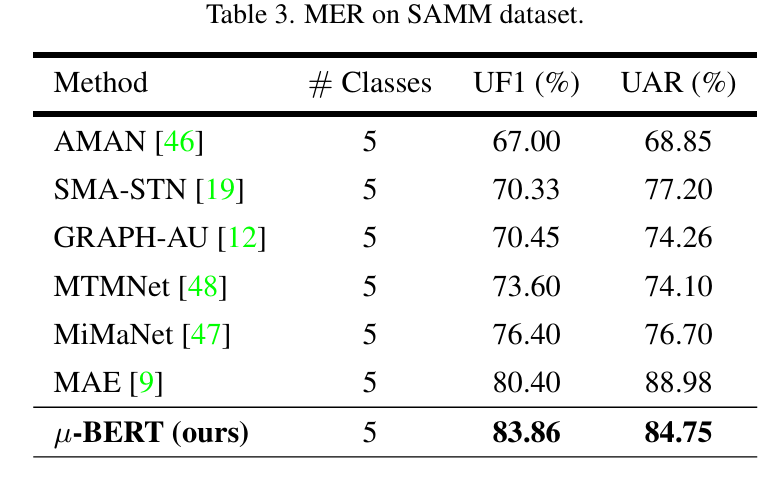
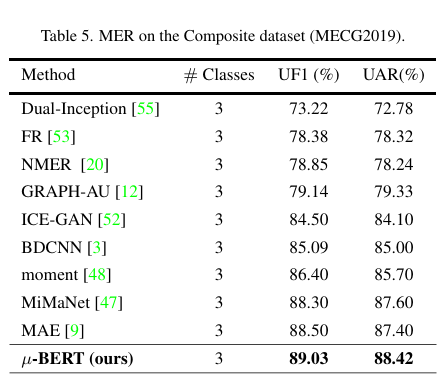

## 5.  Ablationstudies

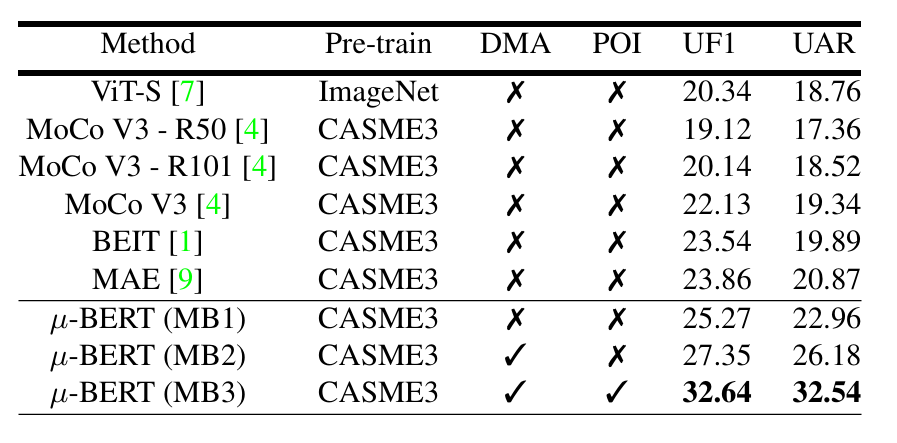

## 6.Conclusions and Discussions

## 1. Research Contribution

- Unlike other studies on **micro-expression recognition**, this research explores how to apply **BERT (Bidirectional Encoder Representations from Transformers)** to this problem.
  
- The authors propose a novel **µ-BERT model**, which includes:
  - **Diagonal Micro-Attention (DMA):** A new attention mechanism designed to **capture micro-movements across frames** in video-based facial expression analysis.
  - **Patch of Interest (POI) Module:** A method to help the model focus on **salient facial regions** while ignoring irrelevant background noise.

## 2. Achievements

- Due to its **simple yet effective design**, µ-BERT achieves **state-of-the-art (SOTA) performance** on four well-known **micro-expression datasets** (including CASME³).
- The study aims to **inspire future research** in using transformer-based architectures for micro-expression analysis.

## 3. Limitations

- While the **POI module** effectively removes background noise, it still has some **sensitivity to lighting conditions**.
- **Potential issue:**
  - If a facial region (e.g., **forehead**) is affected by **lighting changes** but has **no actual movement**, the model might mistakenly consider this as a **micro-expression feature**.
- **Future work:**
  - Improve the model’s **robustness to lighting variations** to avoid false detections.

## 4. Acknowledgments

- The research is supported by:
  - **Arkansas Biosciences Institute (ABI) Grant**
  - **NSFWVAR-CRESH**
  - **NSF Data Science and DART (Data Analytics that are Robust and Trusted)**
- Computational resources were provided by the **Arkansas High-Performance Computing Center (AHPCC)**.

## 5. Key Takeaways

1. The study introduces a **transformer-based model (µ-BERT)** for micro-expression recognition.
2. The **Diagonal Micro-Attention (DMA) mechanism** helps track micro-movements effectively.
3. The **Patch of Interest (POI) module** helps remove unnecessary background noise.
4. The model achieves **SOTA performance** but still needs improvements in handling **lighting variations**.
5. Future research will focus on **improving lighting robustness**.

## code

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
from torchvision import transforms


img_size = 224
imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def image_to_tensor(image):
    x = torch.tensor(image)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum("nhwc->nchw", x).float()
    return x.cuda()


def preprocess(image, img_size):
    image = cv2.resize(image, (img_size, img_size)) / 255
    image = image - imagenet_mean
    image = image / imagenet_std
    return image


def load_image(frame_path, img_size):
    # print(frame_path)
    image = cv2.imread(frame_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return preprocess(image, img_size)


def get_model(checkpoint):
    checkpoint = torch.load(checkpoint)
    args = checkpoint["args"]
    print(args)
    print(checkpoint["epoch"])

    import models.mae as mae_dict

    if "mae" in args.model_name:
        import models.mae as mae_dict

        model = mae_dict.__dict__[args.model_name](
            has_decoder=args.has_decoder,
            aux_cls=args.aux_cls,
            img_size=args.img_size,
            att_loss=args.att_loss,
            diag_att=args.diag_att,
            # DINO params,
            enable_dino=args.enable_dino,
            out_dim=args.out_dim,
            local_crops_number=args.local_crops_number,
            warmup_teacher_temp=args.warmup_teacher_temp,
            teacher_temp=args.teacher_temp,
            warmup_teacher_temp_epochs=args.warmup_teacher_temp_epochs,
            epochs=args.epochs,
        )

    model_state_dict = {}
    for k, v in checkpoint["model"].items():
        model_state_dict[k.replace("module.", "")] = v

    model.load_state_dict(model_state_dict)
    return model, args


checkpoint = 'checkpoints/CASME2-is224-p8-b16-ep200.pth'
your_image_path = 'example.jpg'
model = get_model(checkpoint).cuda()
model.eval()

# To extract features
image = load_image(your_image_path)
image_tensor = image_to_tensor(image)

with torch.no_grad():
    features = model.extract_features(image)
    # Use this features for finetunning.